In [ ]:
#@title 1) Montando o Google Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [22]:
#@title 2) Instalando bibliotecas necessárias

# Instalação da biblioteca Yahoo Finance

!pip install yfinance

In [11]:
#@title 3) Importando bibliotecas necessárias

# Bibliotecas básicas
import numpy as np
import pandas as pd
import datetime as dt

# Visualização de dados
import matplotlib.pyplot as plt

# Aprendizado de máquina
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Biblioteca de Dados Financeiros (Yahoo Finance)
import yfinance as yf

In [23]:
#@title 4) Buscando dados do yahoo finance e usando biblioteca datetime

# Para o modelo usaremos Ativo = BBDC4.SA e Período = 01/01/2008 a 01/01/2023 (15 anos)

# Solicitando o ativo e o período de coleta de dados a se trabalhar
print("1) Seleção do Ativo a ser estudado:")
print("Caso tenha dúvida a respeito do código do ativo que deseja estudar favor consultar o link:")
print("https://br.financas.yahoo.com/")
ativo = input("Digite o código do ativo (ex: BBDC4.SA): ")
print("\n2) Seleção do período de estudo do ativo:")
inicio_str = input("Digite a data de início no formato YYYY-MM-DD: ")
## fim_str = input("Digite a data de fim no formato YYYY-MM-DD: ")

# Converter a data inicio de string para objetos datetime
inicio = dt.datetime.strptime(inicio_str, "%Y-%m-%d")
## fim = dt.datetime.strptime(fim_str, "%Y-%m-%d")

# Perguntar se o usuário deseja usar a data atual como data de fim
opcao_data_atual = input("Deseja usar a data atual como data de fim? (S/N): ").upper()

if opcao_data_atual == "S":
    fim = dt.datetime.now()
else:
    fim_str = input("Digite a data de fim no formato YYYY-MM-DD: ")
    # Converter a data fim de string para objeto datetime
    fim = dt.datetime.strptime(fim_str, "%Y-%m-%d")

# Fazer o download dos dados
print("\n3) Download dos dados:")
data = yf.download(ativo, start=inicio, end=fim)

# Exibição de amostra do dados
print("\n4) Amostra dos dados:")
opcao = input("Deseja ver a amostra de dados com 'print' ou 'display'? ").lower()

if opcao == "print":
    print(data)
elif opcao == "display":
    display(data)
else:
    print("Opção inválida.")

1) Seleção do Ativo a ser estudado:
Caso tenha dúvida a respeito do código do ativo que deseja estudar favor consultar o link:
https://br.financas.yahoo.com/
Digite o código do ativo (ex: BBDC4.SA): bbdc4.sa

2) Seleção do período de estudo do ativo:
Digite a data de início no formato YYYY-MM-DD: 2008-01-01
Deseja usar a data atual como data de fim? (S/N): s

3) Download dos dados:
[*********************100%%**********************]  1 of 1 completed

4) Amostra dos dados:
Deseja ver a amostra de dados com 'print' ou 'display'? display


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2008-01-02,23.535587,23.635349,21.989271,22.030840,11.898607,0
2008-01-03,22.113974,22.317656,21.490459,21.577751,11.656008,0
2008-01-04,21.781433,21.968487,21.137135,21.324188,11.519038,5694095
2008-01-07,21.428108,21.993427,21.415638,21.719082,11.732356,0
2008-01-08,22.113974,22.525494,21.931076,22.051622,11.911977,0
...,...,...,...,...,...,...
2023-09-06,14.660000,14.670000,14.370000,14.380000,14.380000,30673700
2023-09-08,14.350000,14.630000,14.210000,14.380000,14.380000,26255000
2023-09-11,14.520000,14.750000,14.430000,14.650000,14.650000,27501400


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_0, *['Open'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_1, *['High'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_2, *['Low'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_3, *['Close'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_4, *['Open'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_5, *['High'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_6, *['Low'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_7, *['Close'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_8, *[[['Open', 'High'], ['High', 'Low'], ['Low', 'Close'], ['Close', 'Adj Close']]], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_9, *['Date', 'Open', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_10, *['Date', 'High', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_11, *['Date', 'Low', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_12, *['Date', 'Close', None], **{})
chart

In [25]:
#@title 5) Usando a Biblioteca Numpy

print("Uso da Biblioteca Numpy:\n")

# 1. Importando o conjunto de dados para um array Numpy
numpy_data = data.values

# 2. Estatísticas descritivas para os preços de fechamento das ações
close_prices = data['Close'].values
minimo_price = np.min(close_prices)
maximo_price = np.max(close_prices)
mean_price = np.mean(close_prices)
median_price = np.median(close_prices)
std_price = np.std(close_prices)

print(f"Mínima dos Preços de Fechamento: {minimo_price:.2f}")
print(f"Máxima dos Preços de Fechamento: {maximo_price:.2f}")
print(f"Média dos Preços de Fechamento: {mean_price:.2f}")
print(f"Mediana dos Preços de Fechamento: {median_price:.2f}")
print(f"Desvio Padrão dos Preços de Fechamento: {std_price:.2f}")

# 3. Identificando e tratando valores ausentes
missing_values = np.isnan(close_prices).sum()
print(f"Valores Ausentes na Coluna de Fechamento: {missing_values}")

# Tratando os valores ausentes (substituindo pela média, por exemplo)
if missing_values > 0:
    data['Close'].fillna(mean_price, inplace=True)


Uso da Biblioteca Numpy:

Mínima dos Preços de Fechamento: 8.00
Máxima dos Preços de Fechamento: 29.61
Média dos Preços de Fechamento: 15.97
Mediana dos Preços de Fechamento: 14.84
Desvio Padrão dos Preços de Fechamento: 4.81
Valores Ausentes na Coluna de Fechamento: 0


In [26]:
#@title 6) Usando a Biblioteca Pandas

print("Uso da Biblioteca Pandas:\n")

# 4. Criando uma coluna de variação percentual diária
data['Variação Percentual'] = data['Close'].pct_change() * 100
# Uso do método .pct_change() do Pandas
# Também estamos acessando e modificando colunas do DataFrame data usando a notação de colchetes, que é uma funcionalidade do Pandas.

# 5. Agrupando e sumarizando os dados por mês
print("Exibindo a média e a mediana da variação percentual mensal:\n")
monthly_summary = data.resample('M').agg({'Variação Percentual': ['mean', 'median']})
# O método resample('M') é usado para reamostrar o DataFrame com base em períodos mensais.
# O método agg() é uma funcionalidade do Pandas que permite agregar dados.
# Neste caso, estamos calculando a média (mean) e a mediana (median) da coluna 'Variação Percentual' para cada mês.

print(monthly_summary)


Uso da Biblioteca Pandas:

Exibindo a média e a mediana da variação percentual mensal:

           Variação Percentual          
                          mean    median
Date                                    
2008-01-31           -0.593334 -1.021111
2008-02-29            0.668706  0.704487
2008-03-31           -0.355859 -1.192180
2008-04-30            0.795162  0.575581
2008-05-31            0.162953 -0.166680
...                        ...       ...
2023-05-31            0.534937  0.258624
2023-06-30            0.289736  0.231889
2023-07-31            0.070769  0.061377
2023-08-31           -0.453557 -0.520494
2023-09-30           -0.042671  0.133779

[189 rows x 2 columns]


Gráfico 1) Preço do Ativo


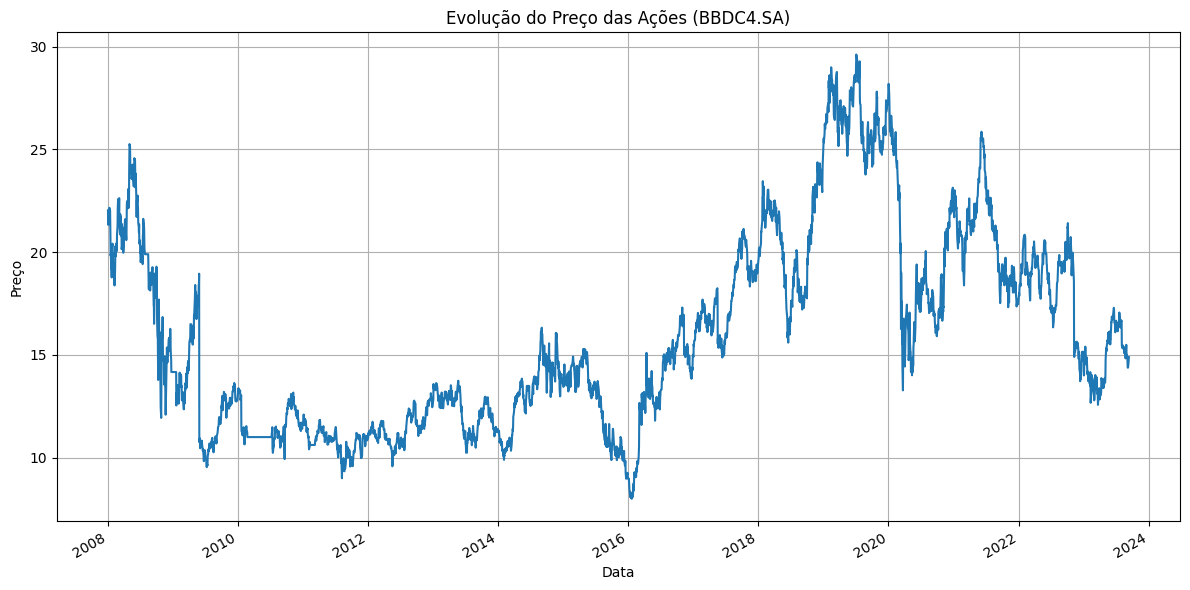


Gráfico 2) Volume de negociações acumulado para cada mês


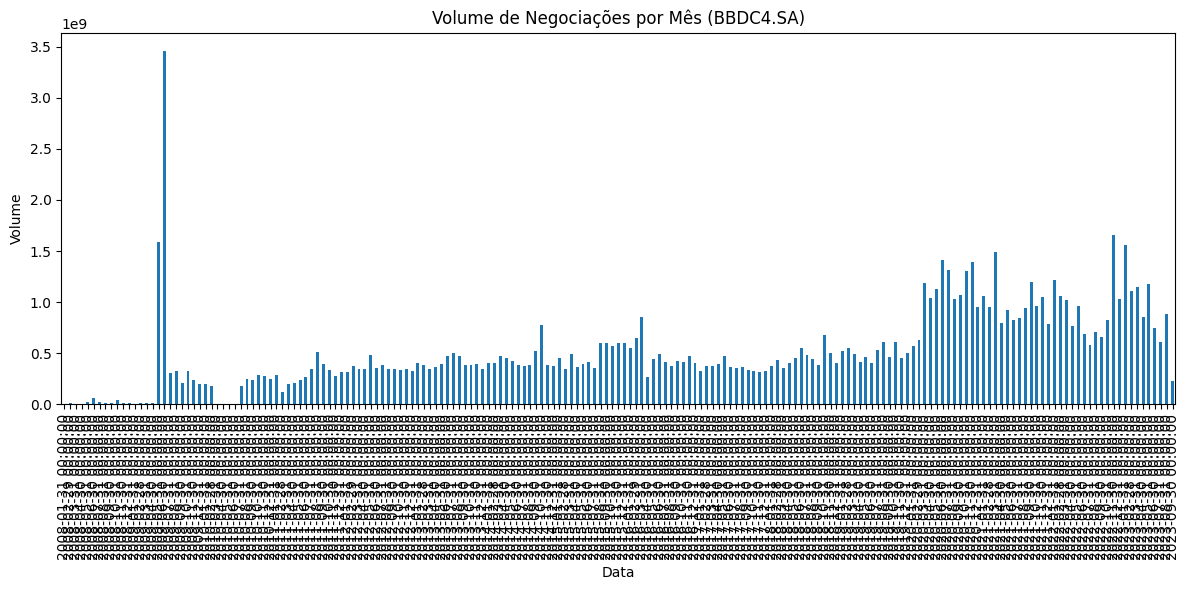


Gráfico 3) Relação entre o preço de fechamento e o volume de negociações para cada dia


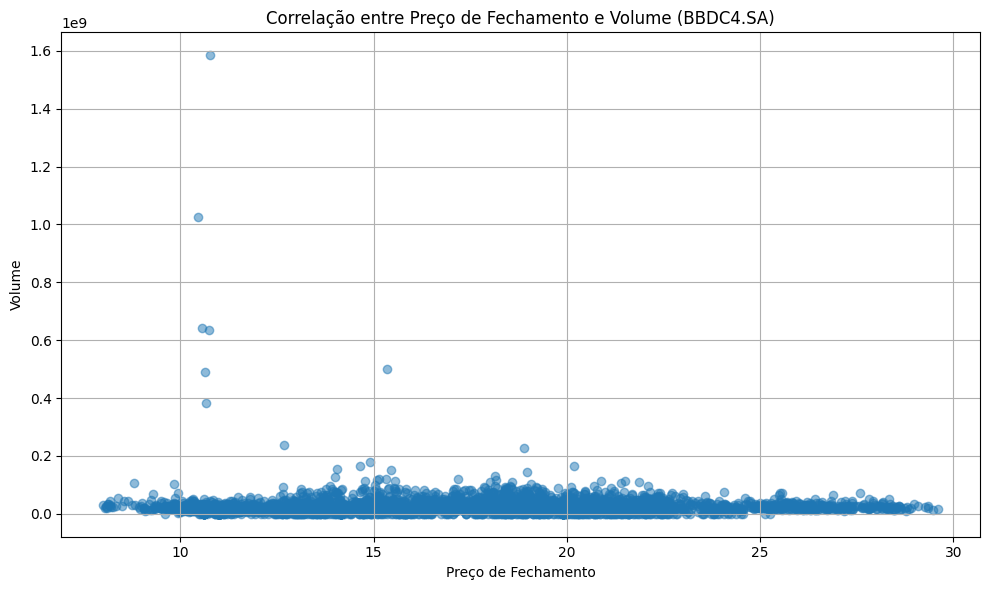

In [27]:
#@title 7) Usando a Biblioteca Matplotlib

# 6. Gráfico de linha para visualizar a evolução do preço das ações
print("Gráfico 1) Preço do Ativo")
plt.figure(figsize=(12, 6))
data['Close'].plot(title='Evolução do Preço das Ações (BBDC4.SA)', xlabel='Data', ylabel='Preço')
plt.grid(True)
plt.tight_layout()
plt.show()

# 7. Gráfico de barras para mostrar o volume de negociações por mês
print("\nGráfico 2) Volume de negociações acumulado para cada mês")
monthly_volume = data['Volume'].resample('M').sum()
plt.figure(figsize=(12, 6))
monthly_volume.plot(kind='bar', title='Volume de Negociações por Mês (BBDC4.SA)', xlabel='Data', ylabel='Volume')
plt.tight_layout()
plt.show()

# 8. Gráficos de dispersão para identificar correlações
print("\nGráfico 3) Relação entre o preço de fechamento e o volume de negociações para cada dia")
plt.figure(figsize=(10, 6))
plt.scatter(data['Close'], data['Volume'], alpha=0.5)
plt.title('Correlação entre Preço de Fechamento e Volume (BBDC4.SA)')
plt.xlabel('Preço de Fechamento')
plt.ylabel('Volume')
plt.grid(True)
plt.tight_layout()
plt.show()

In [28]:
#@title 8) Usando a Biblioteca Scikit-Learn - Etapa 1 de 4: Dividindo o conjunto de dados

def create_features(data, lag_days=5):
    df = data.copy()
    for i in range(1, lag_days + 1):
        df[f'Close_Lag_{i}'] = df['Close'].shift(i)
    df = df.dropna()
    X = df.drop('Close', axis=1)
    y = df['Close']
    return X, y

X, y = create_features(data)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [29]:
#@title 9) Usando a Biblioteca Scikit-Learn - Etapa 2 de 4: Implementando um modelo de regressão

# Criação de Modelo:
model = LinearRegression()
  # Aqui, um novo objeto model é instanciado a partir da classe LinearRegression().
  # Isso cria um modelo de regressão linear ainda não treinado.

# Treinamento do Modelo:
model.fit(X_train, y_train)
  # O método .fit() é usado para treinar o modelo de regressão linear.
  # Ele toma dois argumentos: o conjunto de dados de treinamento X_train (geralmente uma matriz ou DataFrame que contém as variáveis independentes) e y_train (geralmente um vetor ou Series que contém a variável dependente). Com base nessas informações, o modelo aprende a relação entre as variáveis independentes e a variável dependente.

# Previsão com o Modelo:
y_pred = model.predict(X_test)
  # Depois de treinado, o modelo pode ser usado para fazer previsões.
  # Aqui, o método .predict() é usado para prever os valores da variável dependente para um novo conjunto de dados X_test
  # (variáveis independentes que não foram usadas no treinamento).
  # O resultado dessas previsões é armazenado na variável y_pred.

In [30]:
#@title 10) Usando a Biblioteca Scikit-Learn - Etapa 3 de 4: Avaliando o desempenho

# Cálculo do Erro Quadrático Médio (MSE - Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)
# Cálculo do Coeficiente de determinação, ou R^2
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse:.2f}')
print(f'R^2: {r2:.2f}')

MSE: 0.01
R^2: 1.00


# Significado do MSE e R^2:

**Erro Quadrático Médio (MSE - Mean Squared Error):** É uma medida que indica o quanto o modelo de previsão ou regressão está distante dos valores reais. O MSE é calculado a partir da diferença entre os valores reais (y_test) e os valores previstos pelo modelo (y_pred). Essa diferença é elevada ao quadrado (para que todos os valores sejam positivos) e, em seguida, é calculada a média desses valores quadráticos.

**Coeficiente de determinação, ou R^2:** É uma medida estatística que indica o quanto dos dados observados são previstos pelo modelo. Ele varia entre 0 e 1, sendo que um R^2 de 1 indica que o modelo prevê perfeitamente a variável dependente, e um R^2 de 0 indica que o modelo não prevê nada.

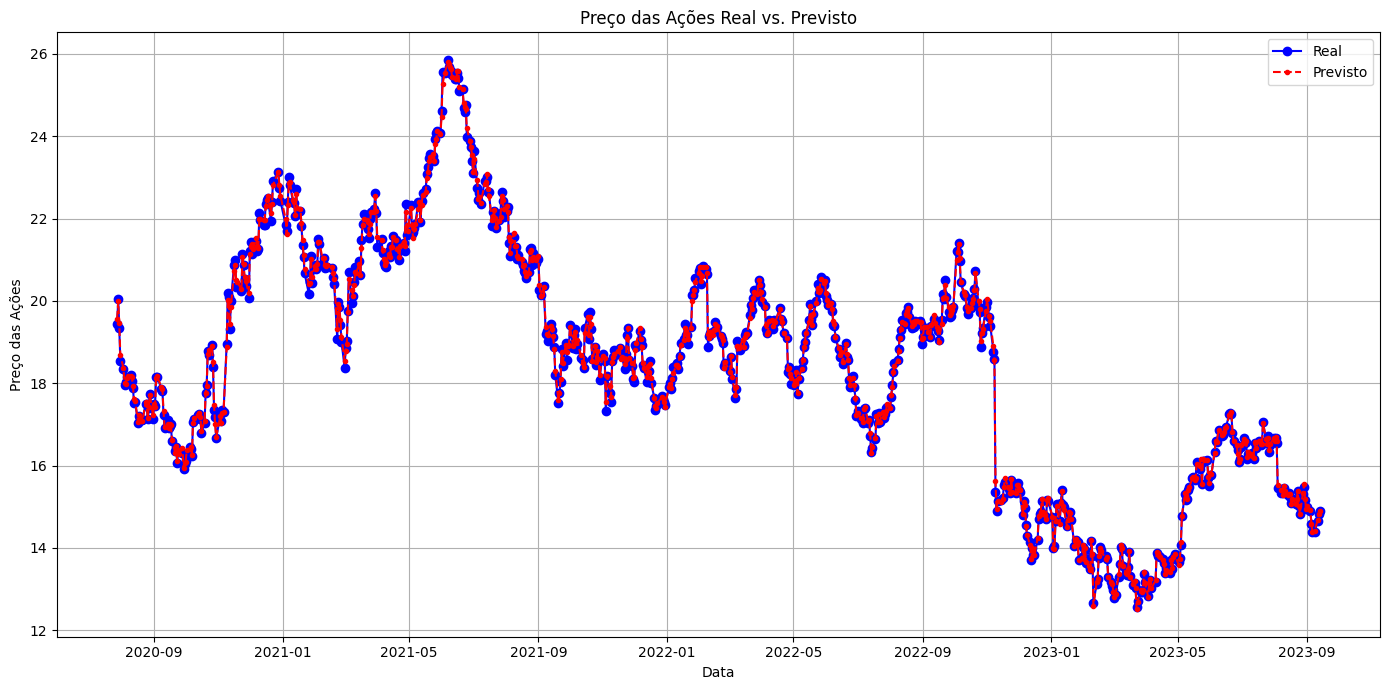

In [32]:
#@title 11) Usando a Biblioteca Scikit-Learn - Etapa 4 de 4: Plotando o resultado (Real x Previsto)

plt.figure(figsize=(14, 7))

# Plotando os preços reais
plt.plot(X_test.index, y_test, label='Real', color='blue', marker='o')

# Plotando os preços previstos
plt.plot(X_test.index, y_pred, label='Previsto', color='red', linestyle='--', marker='.')

plt.title('Preço das Ações Real vs. Previsto')
plt.xlabel('Data')
plt.ylabel('Preço das Ações')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


[*********************100%%**********************]  1 of 1 completed
Acurácia: 0.50
              precision    recall  f1-score   support

           0       0.52      0.64      0.57        78
           1       0.46      0.34      0.39        70

    accuracy                           0.50       148
   macro avg       0.49      0.49      0.48       148
weighted avg       0.49      0.50      0.49       148



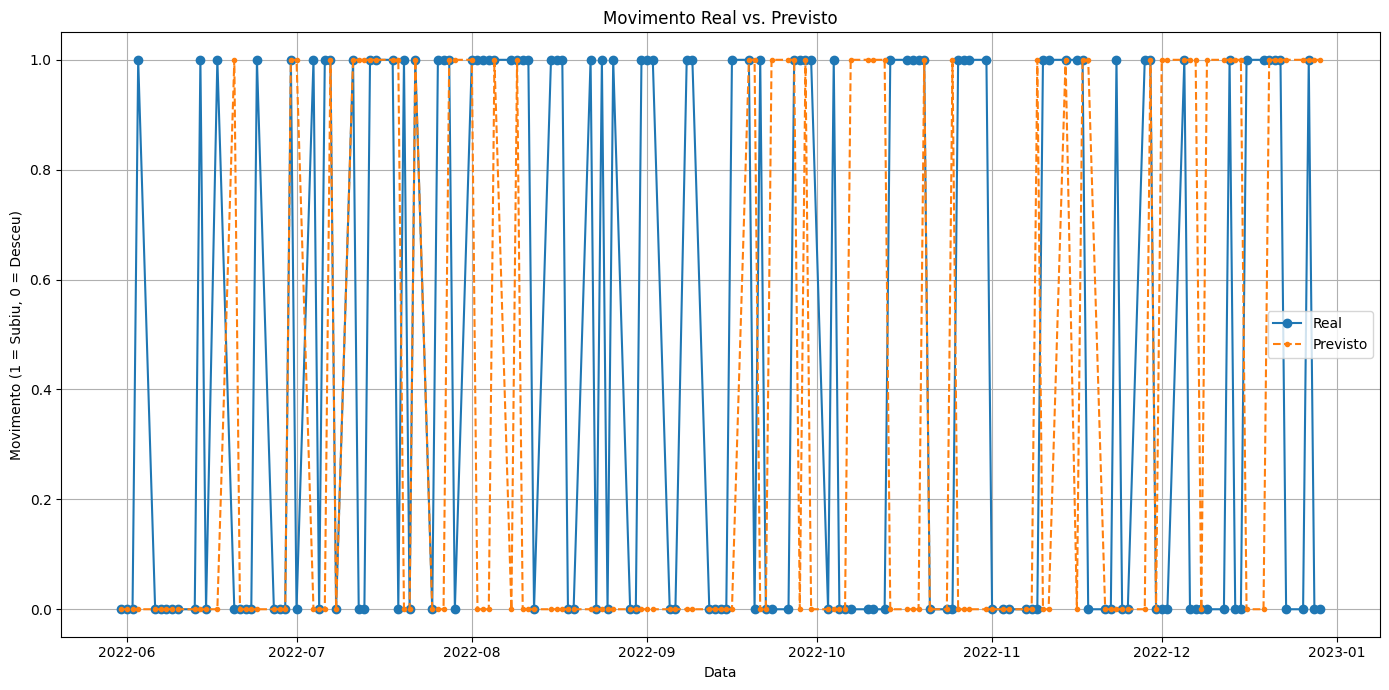

[*********************100%%**********************]  1 of 1 completed
Acurácia: 0.48
              precision    recall  f1-score   support

           0       0.50      0.71      0.59       388
           1       0.43      0.23      0.30       356

    accuracy                           0.48       744
   macro avg       0.47      0.47      0.45       744
weighted avg       0.47      0.48      0.45       744



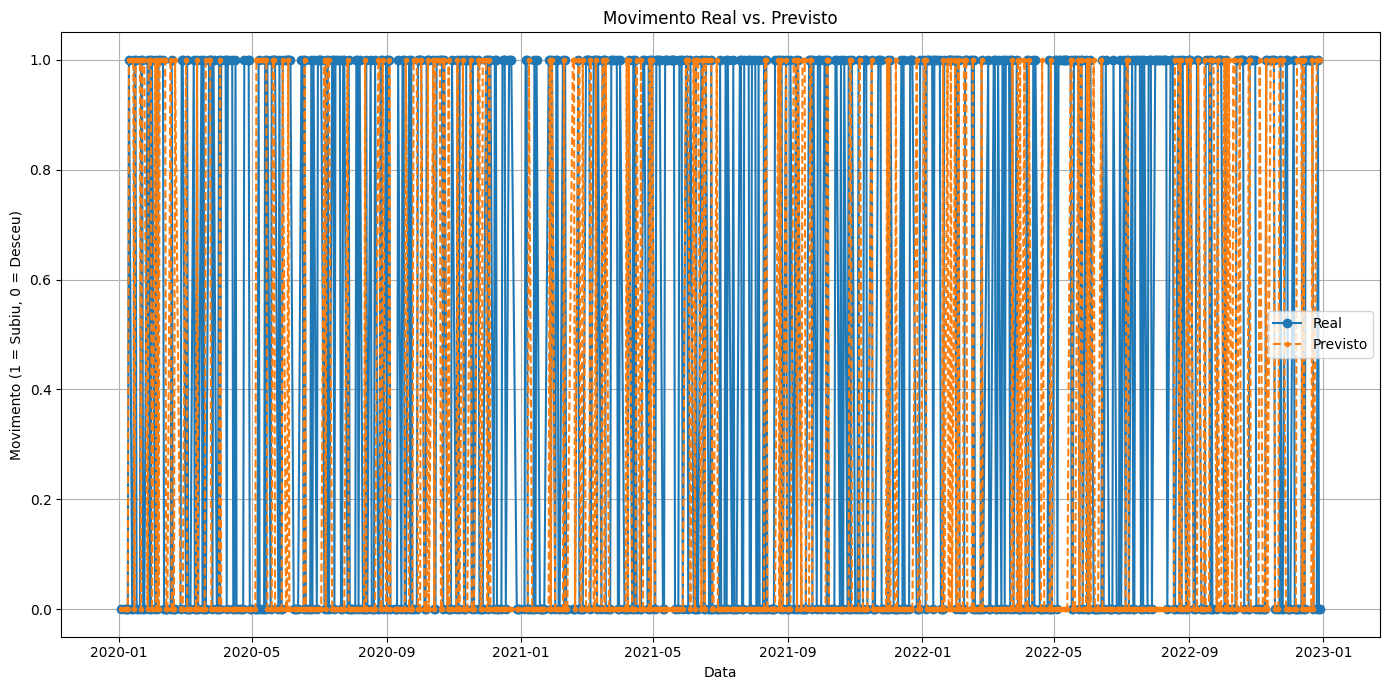

In [33]:
#@title 12) Usando a Biblioteca Scikit-Learn - Modelo de Classificação - Previsão do Movimento do ativo
# Uso de um rótulo binário: 1 se o preço subiu e 0 se o preço desceu.

import pandas as pd
import numpy as np
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Baixando os dados
inicio = dt.datetime(2020, 1, 1)
fim = dt.datetime(2023, 1, 1)
data = yf.download('BBDC4.SA', start=inicio, end=fim)

# Criando o rótulo binário
data['Target'] = np.where(data['Close'].shift(-1) > data['Close'], 1, 0)

# Criando características
for i in range(1, 6):
    data[f'Close_Lag_{i}'] = data['Close'].shift(i)
    data[f'Volume_Lag_{i}'] = data['Volume'].shift(i)

data = data.dropna()

X = data.drop(['Close', 'Target'], axis=1)
y = data['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Treinando um modelo de classificação
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

# Visualizando os resultados
plt.figure(figsize=(14, 7))
plt.plot(X_test.index, y_test, label='Real', marker='o')
plt.plot(X_test.index, y_pred, label='Previsto', linestyle='--', marker='.')
plt.title('Movimento Real vs. Previsto')
plt.xlabel('Data')
plt.ylabel('Movimento (1 = Subiu, 0 = Desceu)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
import pandas as pd
import numpy as np
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Baixando os dados
inicio = dt.datetime(2008, 1, 1)
fim = dt.datetime(2023, 1, 1)
data = yf.download('BBDC4.SA', start=inicio, end=fim)

# Criando o rótulo binário
data['Target'] = np.where(data['Close'].shift(-1) > data['Close'], 1, 0)

# Criando características
for i in range(1, 6):
    data[f'Close_Lag_{i}'] = data['Close'].shift(i)
    data[f'Volume_Lag_{i}'] = data['Volume'].shift(i)

data = data.dropna()

X = data.drop(['Close', 'Target'], axis=1)
y = data['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Treinando um modelo de classificação
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

# Visualizando os resultados
plt.figure(figsize=(14, 7))
plt.plot(X_test.index, y_test, label='Real', marker='o')
plt.plot(X_test.index, y_pred, label='Previsto', linestyle='--', marker='.')
plt.title('Movimento Real vs. Previsto')
plt.xlabel('Data')
plt.ylabel('Movimento (1 = Subiu, 0 = Desceu)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Nota do Professor:**

O Desafio se encerra aqui.

Abaixo apenas alguns extras com pesquisas do professor com outros métodos;

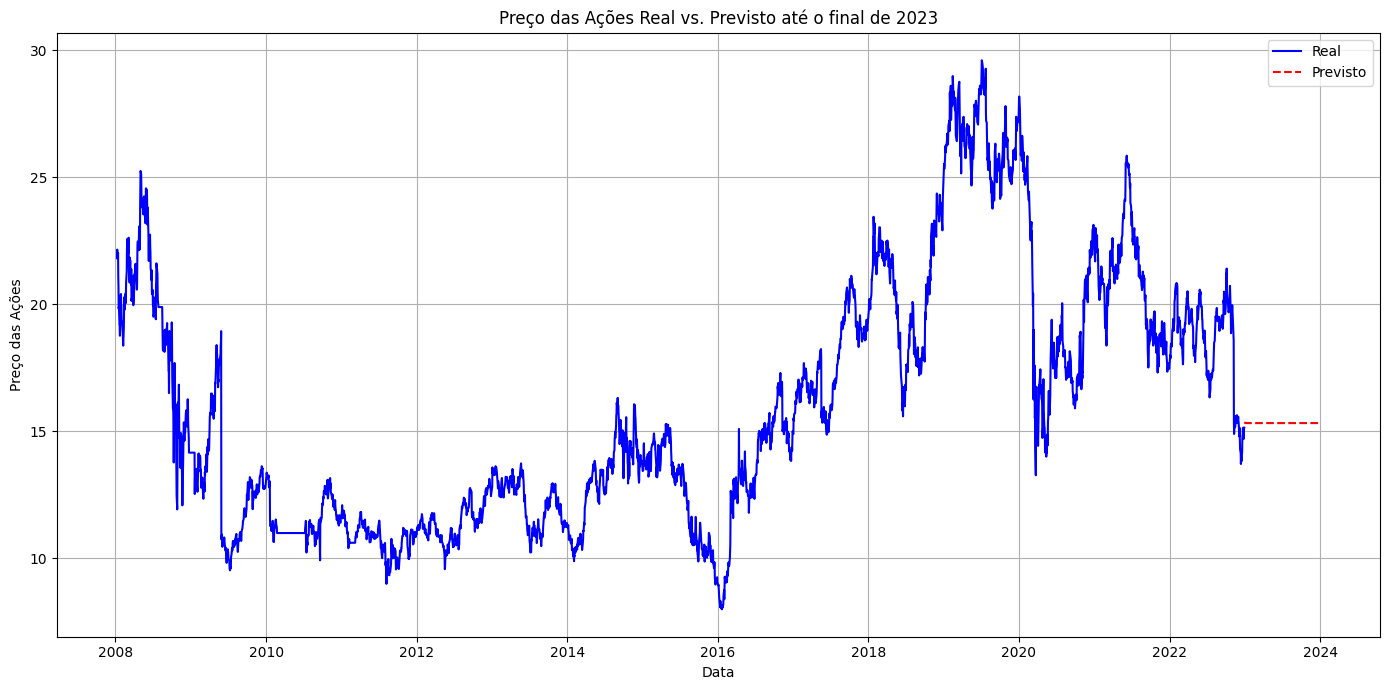

In [21]:
#@title 100) EXTRA - Tentativa previsão preço pelo método de Regressão Linear

## Passo 1: Treinamento
# Considerando que 'data' é o DataFrame original que você forneceu
data_until_2023 = data[data.index < '2023-01-01']

X_full, y_full = create_features(data_until_2023)
model_full = LinearRegression()
model_full.fit(X_full, y_full)

## Passo 2: Previsão iterativa
last_known_data = data_until_2023.iloc[-6:].copy()
predictions = []

for day in pd.date_range(start='2023-01-01', end='2023-12-31'):
    # Preparando os dados para a previsão
    X_new, _ = create_features(last_known_data)
    next_day_prediction = model_full.predict(X_new)[-1]

    # Armazenando a previsão
    predictions.append((day, next_day_prediction))

    # Atualizando os dados conhecidos para a próxima iteração
    new_row = last_known_data.iloc[-1].copy()
    new_row['Close'] = next_day_prediction
    last_known_data = pd.concat([last_known_data, new_row.to_frame().T])
    last_known_data = last_known_data.iloc[1:]

# Convertendo previsões em um DataFrame
predictions_df = pd.DataFrame(predictions, columns=['Date', 'Predicted Close']).set_index('Date')

## Passo 3: Visualizando as previsões
plt.figure(figsize=(14, 7))

# Plotando os preços reais até o início de 2023
plt.plot(data_until_2023.index, data_until_2023['Close'], label='Real', color='blue')

# Plotando as previsões para 2023
plt.plot(predictions_df.index, predictions_df['Predicted Close'], label='Previsto', color='red', linestyle='--')

plt.title('Preço das Ações Real vs. Previsto até o final de 2023')
plt.xlabel('Data')
plt.ylabel('Preço das Ações')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Como a previsao esta ficando ruim (reta), vamos tentar outras abordagens:**

A escolha do modelo depende da natureza dos dados, do tamanho do conjunto de dados e do objetivo específico da modelagem. No contexto do mercado de ações, onde os movimentos dos preços são influenciados por uma ampla gama de fatores, tanto observáveis quanto não observáveis, a tarefa de previsão é notoriamente desafiadora. Vamos discutir as opções mencionadas:

**Florestas Aleatórias (Random Forests):**

Vantagens: Pode capturar relações não lineares nos dados, é menos propenso a sobreajuste em comparação com modelos de árvore de decisão única e oferece importâncias de características, o que pode ser útil para entender quais lag-days (dias anteriores) são mais informativos.
Desvantagens: Pode ser computacionalmente intensivo, especialmente com conjuntos de dados grandes.

**Gradient Boosting:**

Vantagens: Pode ser mais preciso do que as florestas aleatórias em muitos casos. É capaz de otimizar diferentes funções de perda e pode capturar relações não lineares.
Desvantagens: Mais sensível a sobreajuste em comparação com florestas aleatórias, especialmente quando o conjunto de dados não é muito grande. Também pode ser computacionalmente intensivo.

**Redes Neurais:**

Vantagens: Pode capturar relações complexas e não lineares nos dados. Modelos específicos, como redes neurais recorrentes (RNN) ou Long Short-Term Memory (LSTM), são projetados para lidar com sequências temporais e podem ser especialmente úteis para dados de séries temporais como preços de ações.
Desvantagens: Requerem um grande volume de dados para treinamento adequado. São computacionalmente intensivos e podem ser difíceis de interpretar. O risco de sobreajuste é maior, especialmente se a arquitetura da rede for muito complexa.
Recomendação:
Para prever preços de ações, muitos praticantes experimentam uma combinação de modelos. Dadas as opções:

Se você tem um conjunto de dados razoavelmente grande, começar com Redes Neurais, especialmente LSTM, pode ser uma boa ideia, pois esses modelos são projetados para lidar com dados sequenciais.
Se o conjunto de dados não é muito grande ou se você está procurando uma solução mais fácil de implementar e interpretar, Gradient Boosting ou Random Forests podem ser uma escolha mais prática.
Finalmente, independentemente do modelo escolhido, é crucial avaliar seu desempenho em dados de validação (ou teste) e, se possível, em situações do mundo real antes de confiar nas previsões para decisões de investimento.

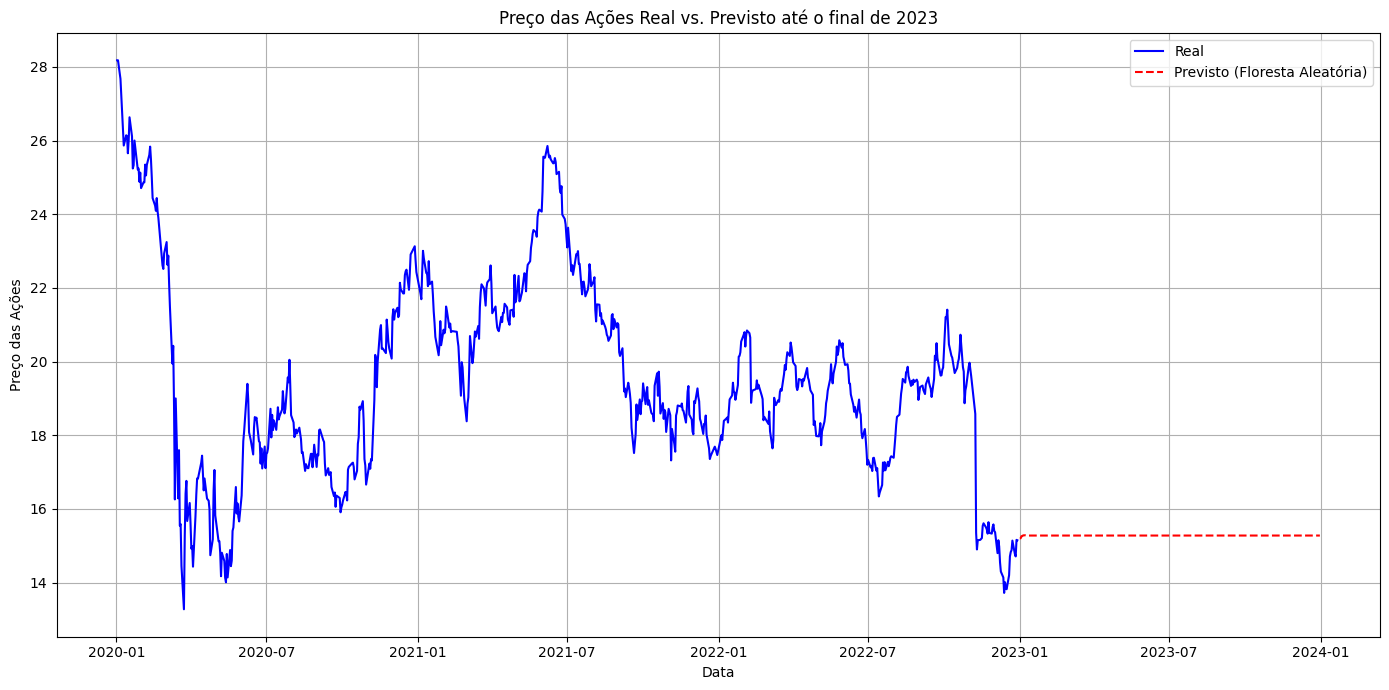

In [ ]:
#@title 101) EXTRA - Tentativa previsão preço pelo método Floresta Aleatória

from sklearn.ensemble import RandomForestRegressor

# Treinando o modelo
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_full, y_full)

rf_predictions = []

last_known_data = data_until_2023.iloc[-6:].copy()

for day in pd.date_range(start='2023-01-01', end='2023-12-31'):
    X_new, _ = create_features(last_known_data)
    next_day_prediction = rf_model.predict(X_new)[-1]
    rf_predictions.append((day, next_day_prediction))

    new_row = last_known_data.iloc[-1].copy()
    new_row['Close'] = next_day_prediction
    last_known_data = pd.concat([last_known_data, new_row.to_frame().T])
    last_known_data = last_known_data.iloc[1:]

  # ... [Código de treinamento e previsão anterior]

# Convertendo previsões em um DataFrame
rf_predictions_df = pd.DataFrame(rf_predictions, columns=['Date', 'Predicted Close']).set_index('Date')

# Plotando as previsões
plt.figure(figsize=(14, 7))
plt.plot(data_until_2023.index, data_until_2023['Close'], label='Real', color='blue')
plt.plot(rf_predictions_df.index, rf_predictions_df['Predicted Close'], label='Previsto (Floresta Aleatória)', color='red', linestyle='--')
plt.title('Preço das Ações Real vs. Previsto até o final de 2023')
plt.xlabel('Data')
plt.ylabel('Preço das Ações')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

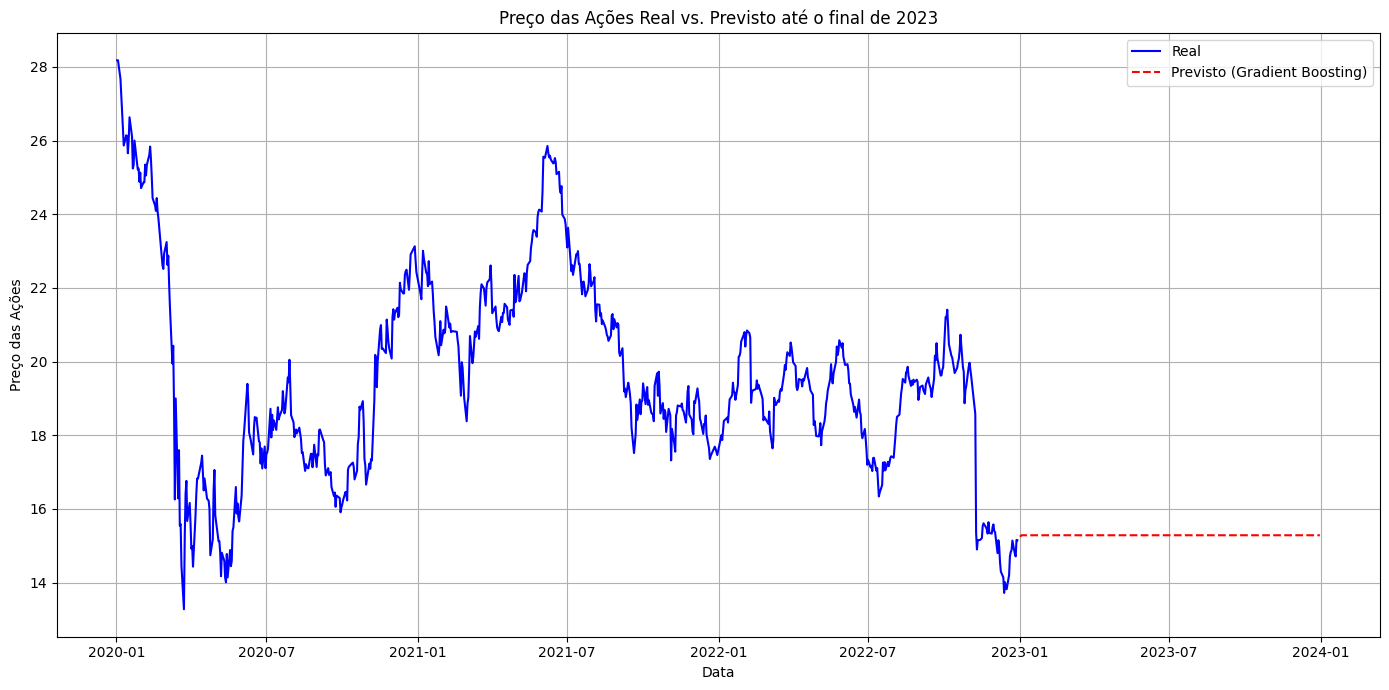

In [ ]:
#@title 102) EXTRA - Tentativa previsão preço pelo método Gradient Boosting

from sklearn.ensemble import GradientBoostingRegressor

# Treinando o modelo
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_full, y_full)

gb_predictions = []

last_known_data = data_until_2023.iloc[-6:].copy()

for day in pd.date_range(start='2023-01-01', end='2023-12-31'):
    X_new, _ = create_features(last_known_data)
    next_day_prediction = gb_model.predict(X_new)[-1]
    gb_predictions.append((day, next_day_prediction))

    new_row = last_known_data.iloc[-1].copy()
    new_row['Close'] = next_day_prediction
    last_known_data = pd.concat([last_known_data, new_row.to_frame().T])
    last_known_data = last_known_data.iloc[1:]

# ... [Código de treinamento e previsão anterior]

# Convertendo previsões em um DataFrame
gb_predictions_df = pd.DataFrame(gb_predictions, columns=['Date', 'Predicted Close']).set_index('Date')

# Plotando as previsões
plt.figure(figsize=(14, 7))
plt.plot(data_until_2023.index, data_until_2023['Close'], label='Real', color='blue')
plt.plot(gb_predictions_df.index, gb_predictions_df['Predicted Close'], label='Previsto (Gradient Boosting)', color='red', linestyle='--')
plt.title('Preço das Ações Real vs. Previsto até o final de 2023')
plt.xlabel('Data')
plt.ylabel('Preço das Ações')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

1/1 [==============================] - 0s 23ms/step


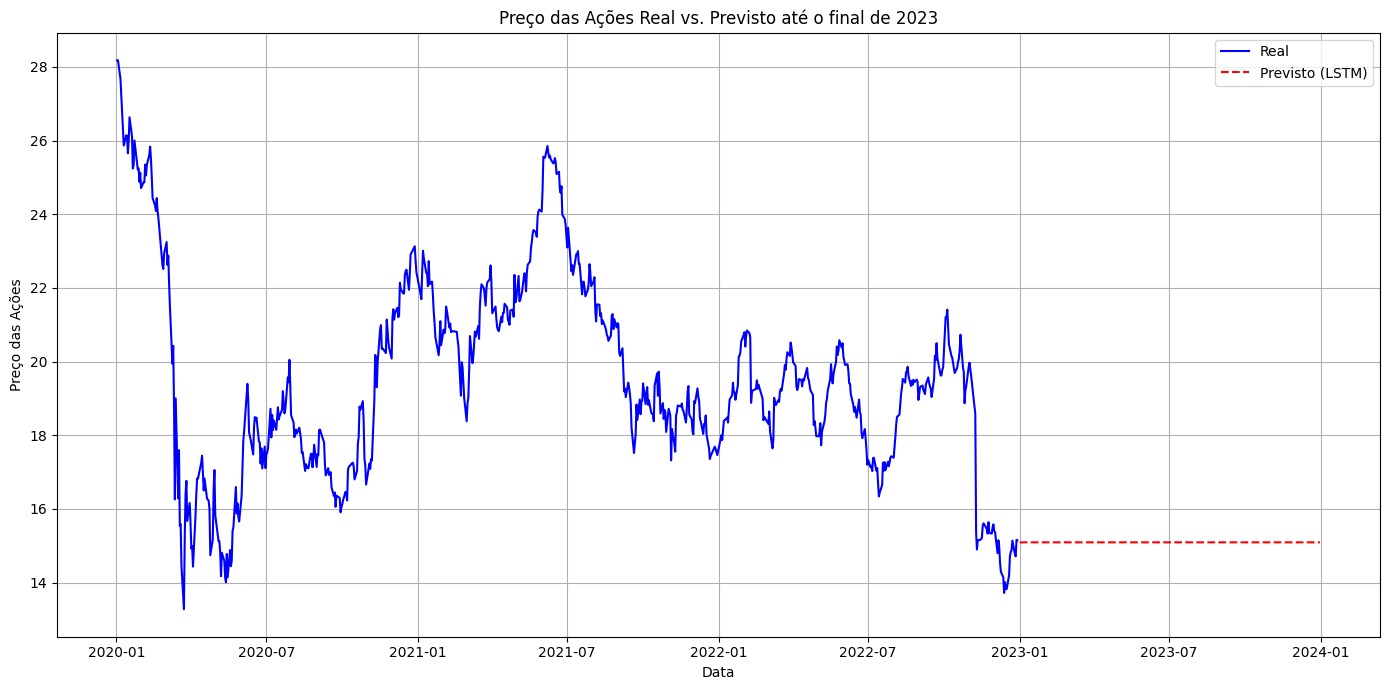

In [ ]:
#@title 103) EXTRA - Tentativa previsão preço pelo método Redes Neurais

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Preparando os dados para LSTM
X_lstm, y_lstm = create_features(data_until_2023)
X_lstm = X_lstm.values.reshape((X_lstm.shape[0], X_lstm.shape[1], 1))

# Definindo a arquitetura LSTM
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_lstm.shape[1], 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Treinando o modelo
model.fit(X_lstm, y_lstm, epochs=50, batch_size=32, verbose=0)

lstm_predictions = []

last_known_data = data_until_2023.iloc[-6:].copy()

for day in pd.date_range(start='2023-01-01', end='2023-12-31'):
    X_new, _ = create_features(last_known_data)
    X_new_lstm = X_new.values.reshape((X_new.shape[0], X_new.shape[1], 1))
    next_day_prediction = model.predict(X_new_lstm)[-1][0]
    lstm_predictions.append((day, next_day_prediction))

    new_row = last_known_data.iloc[-1].copy()
    new_row['Close'] = next_day_prediction
    last_known_data = pd.concat([last_known_data, new_row.to_frame().T])
    last_known_data = last_known_data.iloc[1:]

  # ... [Código de treinamento e previsão anterior]

# Convertendo previsões em um DataFrame
lstm_predictions_df = pd.DataFrame(lstm_predictions, columns=['Date', 'Predicted Close']).set_index('Date')

# Plotando as previsões
plt.figure(figsize=(14, 7))
plt.plot(data_until_2023.index, data_until_2023['Close'], label='Real', color='blue')
plt.plot(lstm_predictions_df.index, lstm_predictions_df['Predicted Close'], label='Previsto (LSTM)', color='red', linestyle='--')
plt.title('Preço das Ações Real vs. Previsto até o final de 2023')
plt.xlabel('Data')
plt.ylabel('Preço das Ações')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Como mesmo usando outras abordagens de machine learning não foi possível prever o preço do ativo vamos tentar outra abordagem:

**Exemplo: Previsão de Movimento do Mercado**

**Definindo o problema:** Vamos tentar prever se o preço das ações subirá ou descerá no dia seguinte com base nas informações dos dias anteriores.

**Base de dados:** Continuaremos usando a base de dados do Bradesco, mas qualquer outra ação com histórico suficiente também serve.

**Passos:**

1) Criar um rótulo binário: 1 se o preço subiu e 0 se o preço desceu.

2) Usar características como preços e volumes anteriores.

3) Dividir o conjunto de dados em treinamento e teste.

4) Treinar um modelo de classificação.

5) Avaliar o modelo no conjunto de testes.

6) Visualizar os resultados.

[*********************100%%**********************]  1 of 1 completed
Acurácia: 0.51
              precision    recall  f1-score   support

           0       0.52      0.69      0.60        78
           1       0.47      0.30      0.37        70

    accuracy                           0.51       148
   macro avg       0.50      0.50      0.48       148
weighted avg       0.50      0.51      0.49       148



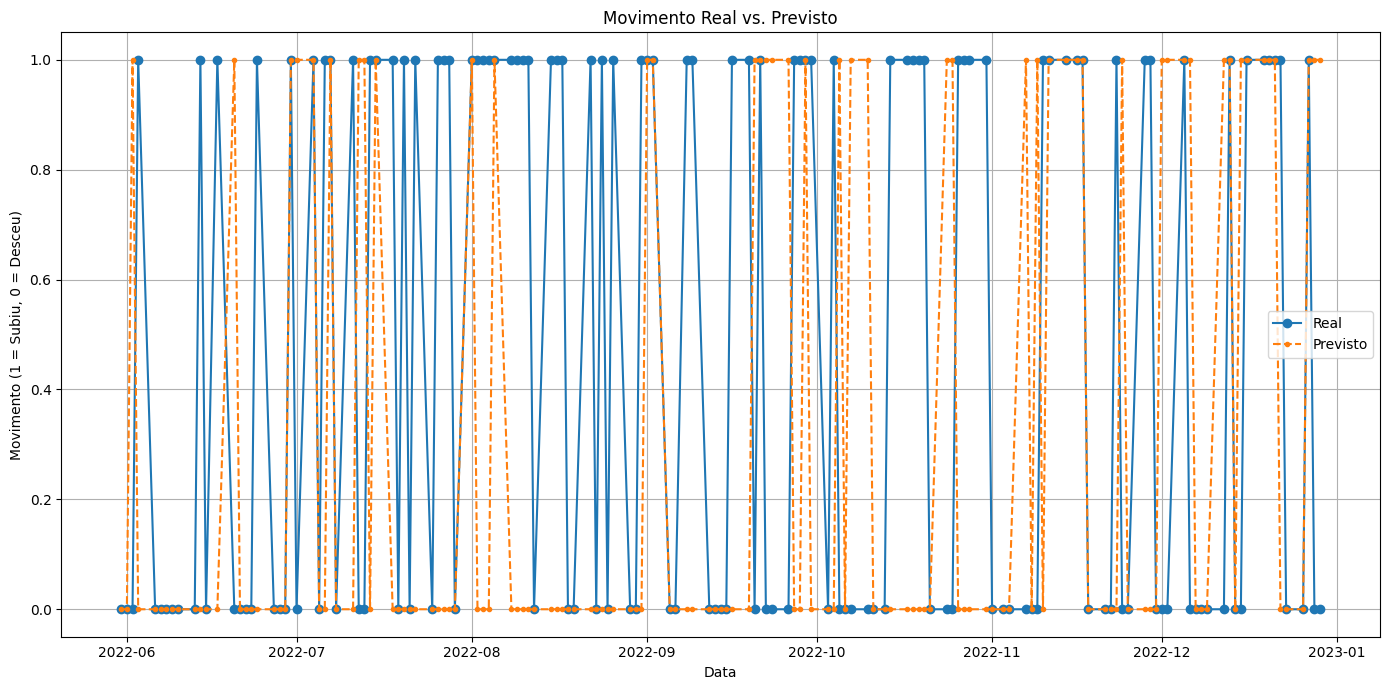

[*********************100%%**********************]  1 of 1 completed
Acurácia: 0.50
              precision    recall  f1-score   support

           0       0.52      0.63      0.57       388
           1       0.47      0.36      0.41       356

    accuracy                           0.50       744
   macro avg       0.49      0.49      0.49       744
weighted avg       0.49      0.50      0.49       744



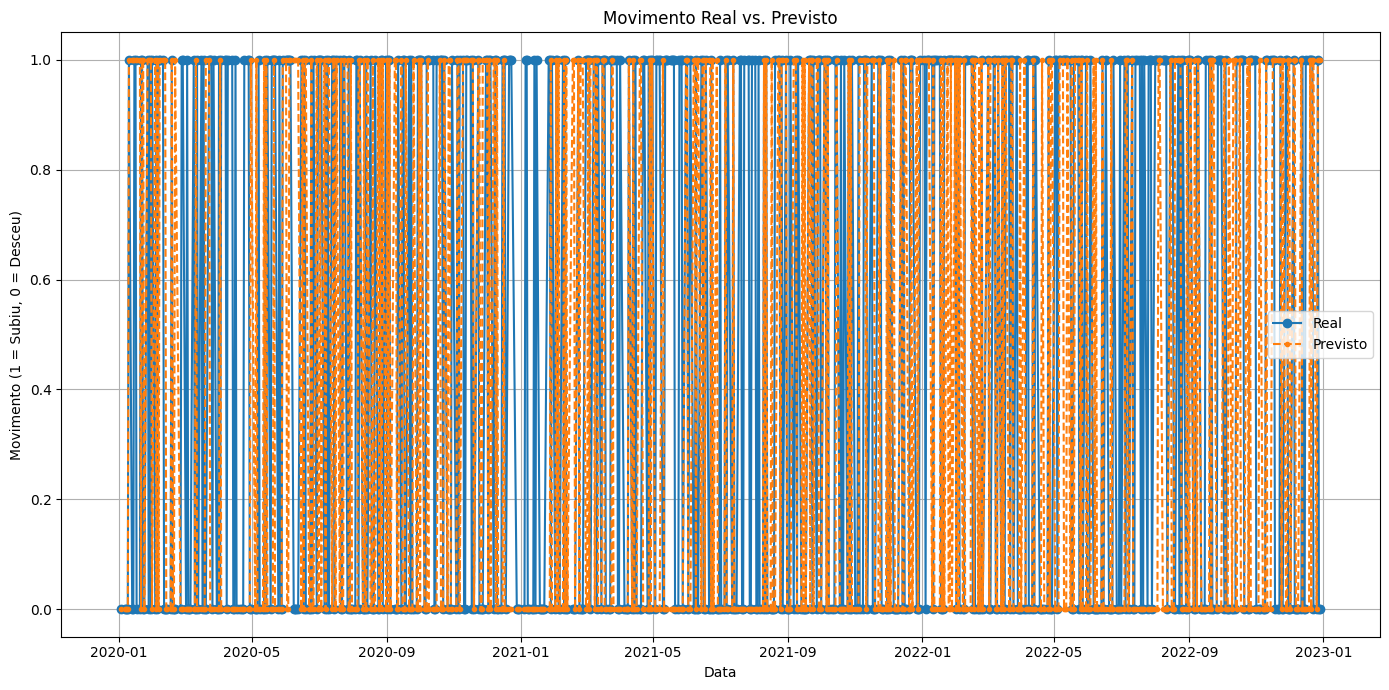

In [ ]:
#@title 104) EXTRA - Modelo de Classificação - Previsão do Movimento do ativo
# Uso de um rótulo binário: 1 se o preço subiu e 0 se o preço desceu.

import pandas as pd
import numpy as np
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Baixando os dados
inicio = dt.datetime(2020, 1, 1)
fim = dt.datetime(2023, 1, 1)
data = yf.download('BBDC4.SA', start=inicio, end=fim)

# Criando o rótulo binário
data['Target'] = np.where(data['Close'].shift(-1) > data['Close'], 1, 0)

# Criando características
for i in range(1, 6):
    data[f'Close_Lag_{i}'] = data['Close'].shift(i)
    data[f'Volume_Lag_{i}'] = data['Volume'].shift(i)

data = data.dropna()

X = data.drop(['Close', 'Target'], axis=1)
y = data['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Treinando um modelo de classificação
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

# Visualizando os resultados
plt.figure(figsize=(14, 7))
plt.plot(X_test.index, y_test, label='Real', marker='o')
plt.plot(X_test.index, y_pred, label='Previsto', linestyle='--', marker='.')
plt.title('Movimento Real vs. Previsto')
plt.xlabel('Data')
plt.ylabel('Movimento (1 = Subiu, 0 = Desceu)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
import pandas as pd
import numpy as np
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Baixando os dados
inicio = dt.datetime(2008, 1, 1)
fim = dt.datetime(2023, 1, 1)
data = yf.download('BBDC4.SA', start=inicio, end=fim)

# Criando o rótulo binário
data['Target'] = np.where(data['Close'].shift(-1) > data['Close'], 1, 0)

# Criando características
for i in range(1, 6):
    data[f'Close_Lag_{i}'] = data['Close'].shift(i)
    data[f'Volume_Lag_{i}'] = data['Volume'].shift(i)

data = data.dropna()

X = data.drop(['Close', 'Target'], axis=1)
y = data['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Treinando um modelo de classificação
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

# Visualizando os resultados
plt.figure(figsize=(14, 7))
plt.plot(X_test.index, y_test, label='Real', marker='o')
plt.plot(X_test.index, y_pred, label='Previsto', linestyle='--', marker='.')
plt.title('Movimento Real vs. Previsto')
plt.xlabel('Data')
plt.ylabel('Movimento (1 = Subiu, 0 = Desceu)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#**105) EXTRA - Método Deep Learning para previsão**

In [ ]:
#@title Instalando o pacote (Yahoo Finance) no Python
!pip install yfinance

In [2]:
#@title Importando as bibliotecas necessárias para o projeto

import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
#@title Buscando a base de dados do BBDC4.SA

data = yf.download(2003-01-01, 2023-08-31)
print(data.head())


SyntaxError: ignored